### Audiotechnik I - Elektroakustik - Sommersemester 2025
## Hausaufgabe 1

### WICHTIG:
Die Auswertung der Programmieraufgaben erfolgt halbautomatisiert.

* Weisen Sie die Werte Ihrer Lösungen den in den Aufgabenstellungen genannten Variablennamen zu, falls angegeben.
* Fügen Sie Lösung von Python-Aufgaben **nur** in den gekennzeichneten Bereichen ein
    ```python
    # Fügen Sie hier Ihre Lösung ein:
    raise NotImplementedError("Löschen Sie diese Zeile")
    # Ab hier nicht mehr bearbeiten.
    ```
    Entfernen Sie den `NotImplementedError`. Er dient lediglich als Platzhalter.
* Fügen Sie Erläuterungen und Diskussionen **nur** in den gekennzeichneten Bereichen ein:

    *Fügen Sie hier Ihre Lösung ein:*

    *Ab hier nicht mehr bearbeiten.*


* Ignorieren Sie alle leeren, schreibgeschützten Zellen.
* Zellen mit `assert`-Tests  dienen der Selbstkontrolle sowie der automatisierten Bewertung. Wenn diese Zellen beim Ausführen einen Fehler auslösen, wurde die Aufgabe nicht richtig gelöst. Bitte verändern Sie **nicht** den Inhalt der Testzellen. Manche Tests sind versteckt: Auch wenn die sichtbaren Tests keine Fehler anzeigen, ist die Aufgabe nicht zwingend richtig gelöst.
* <span style="background-color:red; color:white">**Löschen oder ergänzen sie keine Zellen. Wenn Sie ausversehen eine Zelle löschen, benutzen Sie Strg/CMD+z, um die Zelle wiederherzustellen.**</span>
* <span style="background-color:red; color:white">**Benennen Sie die Dateien nicht um und ändern Sie nichts an der Ordnerstruktur. Komprimieren Sie die fertige Abgabe inklusive aller zum Ausführen des Notebooks benötigten Dateien in ein .zip-Archiv und Laden Sie diese Datei hoch.**</span>

Zur Lösung der Hausaufgabe dürfen die folgenden Module verwendet werden:

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sgs

# Einstellungen für Matplotlib, können auch deaktiviert werden:
matplotlib.rcParams['figure.figsize'] = (6, 3) # default figure size
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Aufgabe 1: Amplitudengänge

### a)

Anbei finden Sie `.csv` Dateien mit Frequenzgängen in dBV des Shure SM58 Tauchspulmikrofons und des Neumann KM120 Kondensatormikrofons, jeweils für drei Einfallswinkel $\theta = [0^\circ, 90^\circ, 180^\circ] $. Lesen Sie die Daten des SM58 und des KM120 in Python als Numpy Arrays ein.

Speichern Sie die Frequenzwerte einer beliebigen Messung (die Werte sind in allen Dateien gleich) in einem eindimensionalen Numpy-Array `freqs` mit der Länge $N_f$ ($N_f$ bezeichnet die Anzahl der Frequenzstützstellen in den gegebenen Spektren).

Fassen sie die Werte der Spannungspegel in ein Array pro Mikrofon, jeweils mit der Dimension $[N_f \times N_\theta]$ zusammen. $N_\theta$ bezeichnet die Anzahl der Einfallswinkel. Nennen Sie die beiden Arrays `sm58` und `km120`. 

*Tipp*: Benutzen Sie `np.stack()`, um Arrays zusammenzufassen. Mit `array.T` können Sie Arrays transponieren.

**(1 Punkt)**

In [21]:
# Fügen Sie hier Ihre Lösung ein:
# SM58 matrix
data = np.loadtxt("./SM58/sm58_0.csv", delimiter=",", skiprows=1);
freqs = data[:,0]
sm58_0 = data[:,1]
data = np.loadtxt("./SM58/sm58_90.csv", delimiter=",", skiprows=1);
sm58_90 = data[:,1]
data = np.loadtxt("./SM58/sm58_180.csv", delimiter=",", skiprows=1);
sm58_180 = data[:,1]
sm58 = np.stack([sm58_0, sm58_90, sm58_180], axis=1)

# KM120 matrix
data = np.loadtxt("./KM120/km120_0.csv", delimiter=",", skiprows=1);
km120_0 = data[:,1]
data = np.loadtxt("./KM120/km120_90.csv", delimiter=",", skiprows=1);
km120_90 = data[:,1]
data = np.loadtxt("./KM120/km120_180.csv", delimiter=",", skiprows=1);
km120_180 = data[:,1]
km120 = np.stack([km120_0, km120_90, km120_180], axis=1)
print(km120.shape);
# Ab hier nicht mehr bearbeiten.

(109, 3)


In [ ]:
# DIESE ZELLE NICHT BEARBEITEN
### BEGIN TESTS
assert isinstance(freqs, np.ndarray)
assert isinstance(sm58,  np.ndarray)
assert isinstance(km120, np.ndarray)

assert np.shape(freqs)  == (109,), f"{np.shape(freqs) = }"
assert np.shape(sm58)   == (109, 3), f"{np.shape(sm58) = }"
assert np.shape(km120)  == (109, 3), f"{np.shape(km120) = }"

assert np.round(sm58[0,0], 4) == -96.8187, f"{sm58[0,0] = }"
assert np.round(sm58[1,1], 4) == -98.7007, f"{sm58[1,1] = }"
assert np.round(sm58[2,2], 4) == -96.6961, f"{sm58[2,2] = }"

assert np.round(km120[0,0], 4) == -77.6298, f"{km120[0,0] = }"
assert np.round(km120[1,1], 4) == -83.4781, f"{km120[1,1] = }"
assert np.round(km120[2,2], 4) == -69.6046, f"{km120[2,2] = }"
### END TESTS


### b)

Normalisieren Sie alle Messwerte der Spektren eines Mikrofons auf den Wert der 0°-Messung bei 1000 Hz (0-dB-Punkt).

*Tipp*: Benutzen Sie `np.where()`, um nicht manuell den richtigen Index suchen zu müssen. Der Wert 1000 Hz kommt in `freqs` vor, so dass Sie keine Nearest Neighbour Search benötigen.

**(1 Punkt)**

In [25]:
# Fügen Sie hier Ihre Lösung ein:
idx_1000 = np.where(freqs == 1000)[0][0]

# to normaize db we must subtract the reference level
reference_level_sm58 = sm58[idx_1000, 0]
sm58 = sm58 - reference_level_sm58

reference_level_km120 = km120[idx_1000, 0]
km120 = km120 - reference_level_km120
# Ab hier nicht mehr bearbeiten.

In [26]:
# DIESE ZELLE NICHT BEARBEITEN
### BEGIN TESTS
assert np.round(sm58[44, 0], 4) == -02.1906, f"{sm58[44, 0] = }"
assert np.round(sm58[33, 1], 4) == -11.0417, f"{sm58[33, 1] = }"
assert np.round(sm58[22, 2], 4) == -8.921, f"{sm58[22, 2] = }"

assert np.round(km120[44, 0], 4) == -1.2199, f"{km120[44, 0] = }"
assert np.round(km120[33, 1], 4) == -35.5725, f"{km120[33, 1] = }"
assert np.round(km120[22, 2], 4) == -3.3806, f"{km120[22, 2] = }"
### END TESTS

### c)

Plotten Sie die Frequenzgänge der zwei Mikrofone für die drei Einfallsrichtungen. 

Erzeugen Sie zwei Plots (eine `figure` pro Mikrofon). Stellen sie die Frequenzen logarithmisch dar (`plt.semilogx()`). Skalieren Sie die y-Achsen von beiden Plots auf das Intervall $[-40 \,\mathrm{dB}, 5 \,\mathrm{dB}]$. Achten Sie auf korrekte Achsenbeschriftungen und fügen Sie Legenden ein.

**(2 Punkte)**

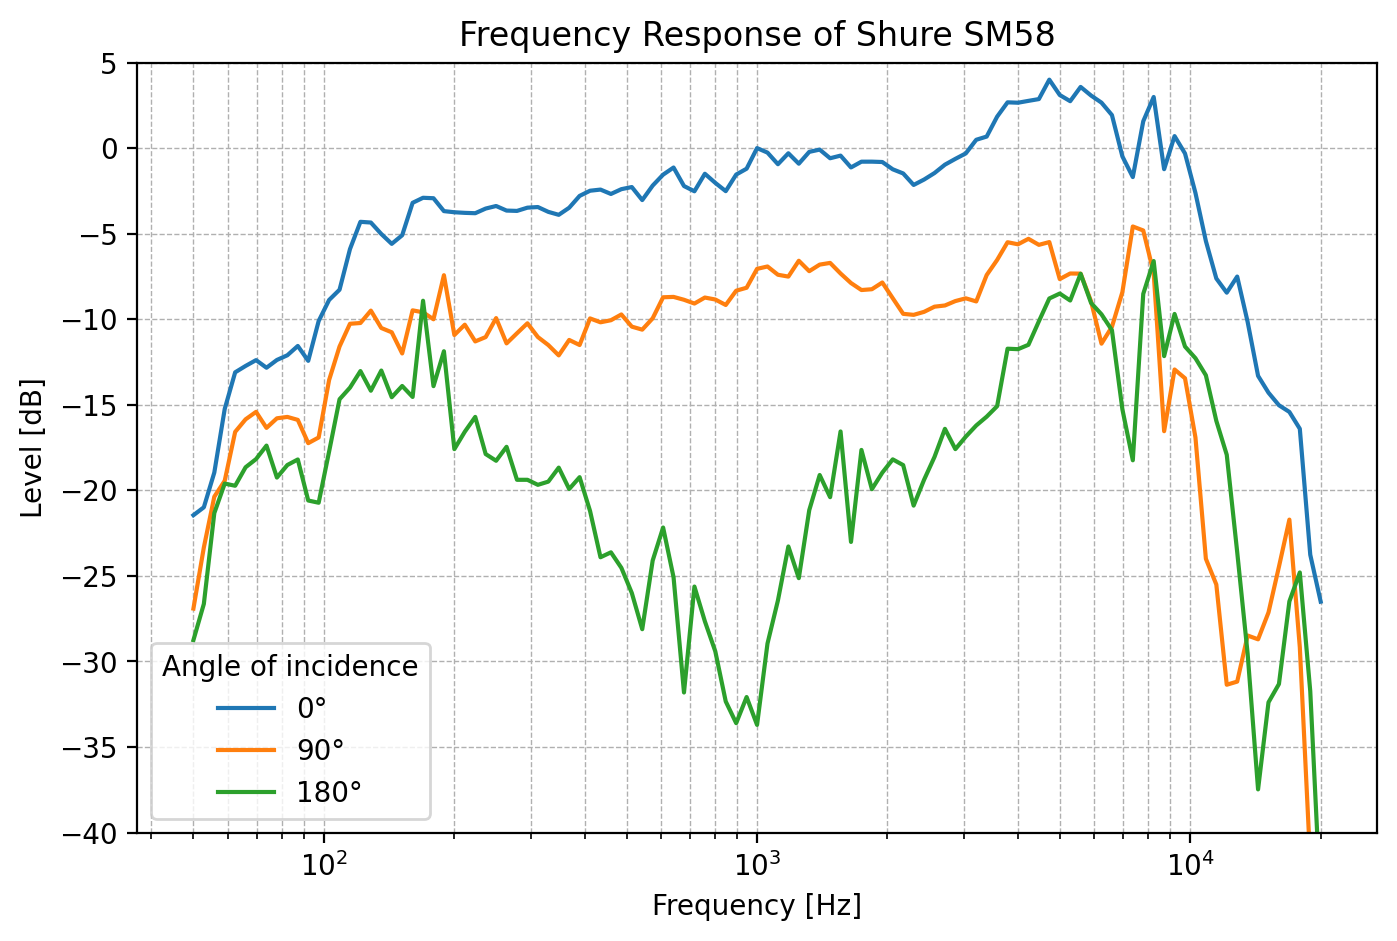

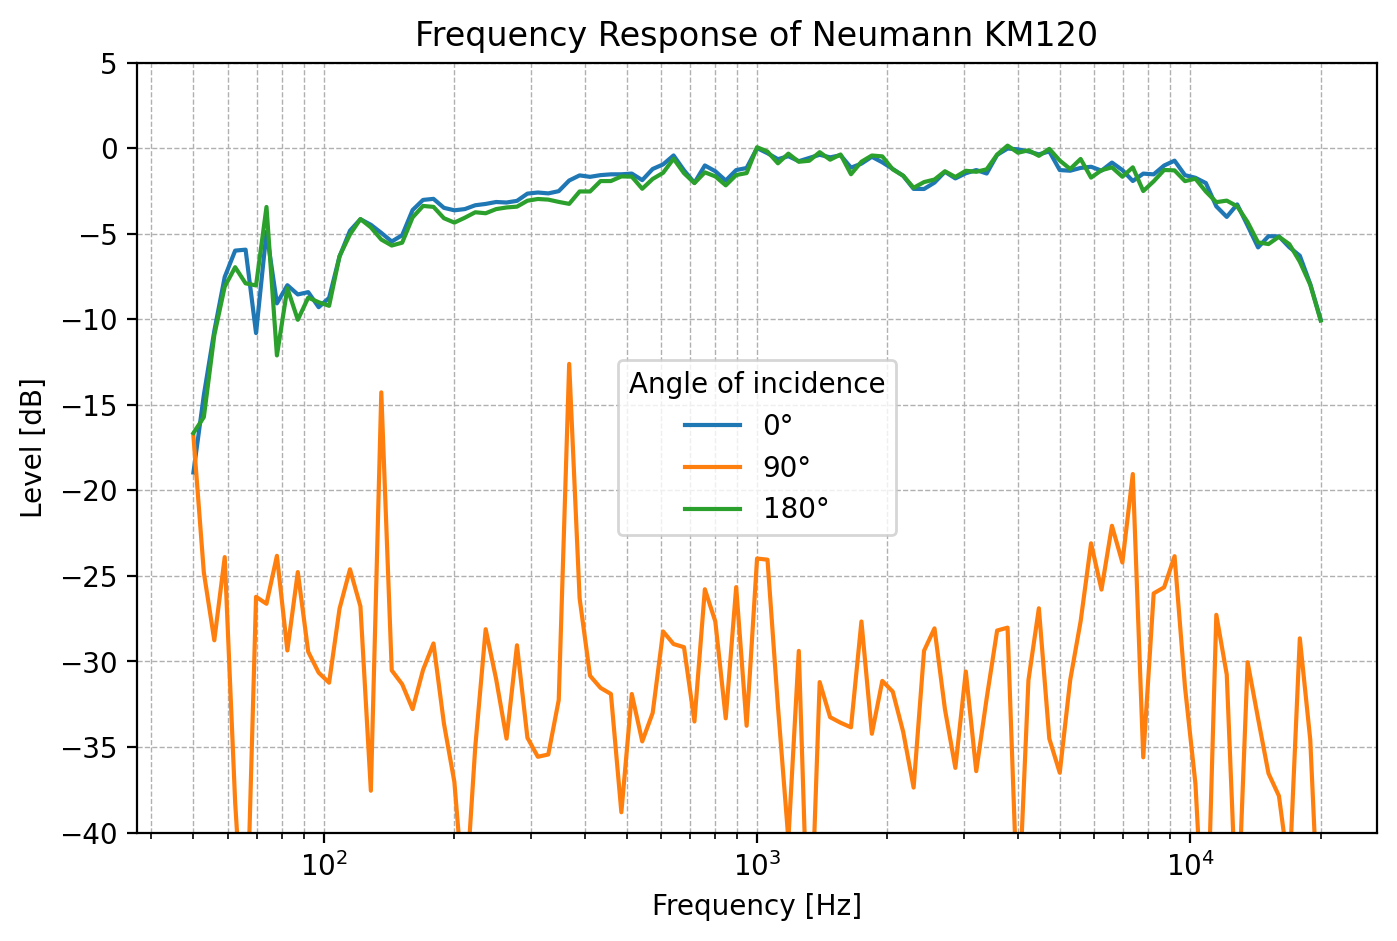

In [ ]:
# Fügen Sie hier Ihre Lösung ein:
# Angles corresponding to the columns
angles = [0, 90, 180]

# Plot for SM58
plt.figure(figsize=(8, 5))
for i, angle in enumerate(angles):
    plt.semilogx(freqs, sm58[:, i], label=f"{angle}°")
plt.ylim([-40, 5])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Level [dB]")
plt.title("Frequency Response of Shure SM58")
plt.legend(title="Angle of incidence")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# Plot for KM120
plt.figure(figsize=(8, 5))
for i, angle in enumerate(angles):
    plt.semilogx(freqs, km120[:, i], label=f"{angle}°")
plt.ylim([-40, 5])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Level [dB]")
plt.title("Frequency Response of Neumann KM120")
plt.legend(title="Angle of incidence")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# clear inidication of the figure 8 polar pattern with weak sensitivity at 90
# Ab hier nicht mehr bearbeiten.

plt.show()

# Aufgabe 2: Gleitender Mittelwert

### a)

Glätten Sie die Frequenzgänge durch einen gleitenden Mittelwert über drei benachbarte Bins durch Faltung mit einem geeigneten Fenster. 

1. Erzeugen Sie ein geeignetes Fenster als eindimensionales Numpy-Array.
2. Fügen Sie dem Fenster mit `[:, None]` eine zweite Dimension hinzu (sonst funktioniert der nächste Schritt nicht).
3. Benutzen Sie `sgs.fftconvolve(..., axes=...)`, um die Frequenzgänge mit dem Fenster zu Falten. Benutzen Sie den Parameter `axes`, um nur über die Dimension der Frequenzbins zu falten.
4. Verwerfen Sie alle Werte, bei denen sich die beiden Arrays nicht komplett überschneiden, bei denen der gleitende Mittelwert also keine gültigen Ergebnisse liefert. 
5. Speichern Sie die Ergebnisse in den Variablen `sm58_smoothed` und `km120_smoothed`.

Erzeugen Sie ein Array `freqs_smoothed`, bei denen auch die entsprechenden Frequenzstützstellen verworfen werden.

*Tipp*: Schauen Sie sich die Dokumentation von [sgs.fftconvolve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html) an. `sgs.fftconvolve` funktioniert ähnlich wie `np.convolve`, ist aber auch mit mehrdimensionalen Arrays kompatibel.

**(2 Punkte)**

In [ ]:
# Fügen Sie hier Ihre Lösung ein:
raise NotImplementedError("Löschen Sie diese Zeile")
# Ab hier nicht mehr bearbeiten.

In [ ]:
# DIESE ZELLE NICHT BEARBEITEN
### BEGIN TESTS
assert np.round(sm58_smoothed[43, 0], 4) == -2.2602, f"{sm58_smoothed[43, 0] = }"
assert np.round(sm58_smoothed[32, 1], 4) == -10.9298, f"{sm58_smoothed[32, 1] = }"
assert np.round(sm58_smoothed[21, 2], 4) == -12.4582, f"{sm58_smoothed[21, 2] = }"

assert np.round(km120_smoothed[43, 0], 4) == -1.3482, f"{km120_smoothed[43, 0] = }"
assert np.round(km120_smoothed[32, 1], 4) == -35.1567, f"{km120_smoothed[32, 1] = }"
assert np.round(km120_smoothed[21, 2], 4) == -3.6217, f"{km120_smoothed[21, 2] = }"
### END TESTS

### b)

Plotten Sie die geglätteten Frequenzgänge.

Erzeugen Sie wieder zwei Plots (eine `figure` pro Mikrofon). Stellen sie die Frequenzen logarithmisch dar (`plt.semilogx()`). Skalieren Sie die y-Achsen von beiden Plots auf das Intervall $[-40 \,\mathrm{dB}, 5 \,\mathrm{dB}]$. Achten Sie auf korrekte Achsenbeschriftungen und fügen Sie Legenden ein.

**(1 Punkt)**

In [ ]:
# Fügen Sie hier Ihre Lösung ein:
raise NotImplementedError("Löschen Sie diese Zeile")
# Ab hier nicht mehr bearbeiten.

### c)

Beschreiben Sie die Spektren. Welche Richtcharakteristiken haben die beiden Mikrofone?

**(1 Punkt)**

*Fügen Sie hier Ihre Lösung ein:*


*Ab hier nicht mehr bearbeiten.*

# Aufgabe 3: Richtungsfaktor

### a)
 
Lesen Sie die gemessenen Werte für die Richtcharakteristik des Mikrofons KM 184 aus der Excel-Datei `KM184.xlsx` als Pandas-DataFrame `km184` ein. 

In der ersten Spalte sind die Frequenzen Frequenzen $f$ in Hz gegeben, in den anderen Spalten sind für Einfallswinkel $\theta = [0^\circ, 5^\circ, ..., 180^\circ]$ gemessene Spannungspegel $L_U(f, \theta)$ in dBV an den jeweiligen Frequenzen gegeben.

**(1 Punkt)**

In [ ]:
# Fügen Sie hier Ihre Lösung ein:
raise NotImplementedError("Löschen Sie diese Zeile")
# Ab hier nicht mehr bearbeiten.

In [ ]:
# DIESE ZELLE NICHT BEARBEITEN
### BEGIN TESTS
assert isinstance(km184, pd.DataFrame)

assert np.round(km184.iloc[44, 1], 4) == 11.44,   f"{km184.iloc[44, 1] = }"
assert np.round(km184.iloc[33, 2], 4) == 10.41,   f"{km184.iloc[33, 2] = }"
assert np.round(km184.iloc[99, 0], 4) == 3945.28, f"{km184.iloc[99, 0] = }"
### END TESTS

### b)

Berechnen Sie für das KM 184 den Richtungsfaktor $ \Gamma(f,\theta)$, abhängig von der Frequenz $f$ und dem Einfallswinkel $\theta$.

Speichern Sie die Werte in das Numpy Array `richtungsfaktor`. Das Array soll die Dimensionen $[N_f \times N_\theta]$ haben, wobei $N_f$ die Anzahl der Frequenzstützstellen und $N_\theta$ die Anzahl der Einfallswinkel beschreibt.

**(1 Punkt)**

In [ ]:
# Fügen Sie hier Ihre Lösung ein:
raise NotImplementedError("Löschen Sie diese Zeile")
# Ab hier nicht mehr bearbeiten.

In [ ]:
# DIESE ZELLE NICHT BEARBEITEN
### BEGIN TESTS
assert isinstance(richtungsfaktor, np.ndarray)
assert richtungsfaktor.shape == (135, 37)
assert np.round(richtungsfaktor[10,  5], 4) == 0.9561, f"{richtungsfaktor[10,  5] = }"
assert np.round(richtungsfaktor[20, 10], 4) == 0.8241, f"{richtungsfaktor[20, 10] = }"
assert np.round(richtungsfaktor[30, 23], 4) == 0.3338, f"{richtungsfaktor[30, 23] = }"
### END TESTS

### c)

Plotten Sie in ein Polardiagramm für die Frequenzen 100, 1000 und 10000 Hz das Richtungsmaß 

$$ G(f, \theta) = 20 \lg | \Gamma(f,\theta)| \,\mathrm{dB}$$ 

Achtung: In dieser Formel steht den Betrag $| \Gamma(f,\theta)|$. Der Betrag ist relevant, wenn die Richtungsfaktoren negativ sein können. 

Plotten Sie außerdem das Richtungsmaß der idealen Niere

$$\Gamma_\mathrm{Niere}(\theta) = 0.5 + 0.5 \cos \theta.$$

Schränken Sie den Winkelbereich auf das Intervall $[0, \pi]$ ein. Schränken Sie den y-Wertebereich auf $[-35\,\mathrm{dB}, 5\,\mathrm{dB}]$ ein. Fügen Sie eine Legende ein.

**(2 Punkte)**

In [ ]:
# Tipp: Nearest Neighbour Search könnte hilfreich sein:
def find_nearest_index(array, value):
    "Find index of nearest value. If value is a list, return a list of indices."
    array = np.asarray(array)

    if np.isscalar(value):
        return np.abs(array - value).argmin()
    else:
        return [find_nearest_index(array, v) for v in value]

# Fügen Sie hier Ihre Lösung ein:
raise NotImplementedError("Löschen Sie diese Zeile")
# Ab hier nicht mehr bearbeiten.
plt.show()

### d)

Stimmen die gemessenen Richtungsfaktoren mit der theoretischen Nierencharakteristik überein?

**(1 Punkt)**

*Fügen Sie hier Ihre Lösung ein:*


*Ab hier nicht mehr bearbeiten.*

# Aufgabe 4: Bündelungsgrad und Bündelungsmaß

### a)

Berechnen Sie den Bündelungsgrad $\gamma(f) = \frac{M_0^2(f)}{M_\mathrm{diff}^2(f)}$ des KM 184. Gehen Sie dabei davon aus, dass die Richtcharakteristik des Mikrofons rotationsymmetrisch ist (s. Folien und Notizen zur Übung). Speichern Sie die Werte in einem eindimensionalen Array `buendelungsgrad` der Länge $N_f$.

**(1 Punkt)**

In [ ]:
# Fügen Sie hier Ihre Lösung ein:
raise NotImplementedError("Löschen Sie diese Zeile")
# Ab hier nicht mehr bearbeiten.

In [ ]:
# DIESE ZELLE NICHT BEARBEITEN
### BEGIN TESTS
assert buendelungsgrad.shape == (135,)
assert np.round(buendelungsgrad[0], 4) == 2.8989,  f"{buendelungsgrad[0] = }"
assert np.round(buendelungsgrad[10], 4) == 3.1103, f"{buendelungsgrad[10] = }"
assert np.round(buendelungsgrad[30], 4) == 2.7479, f"{buendelungsgrad[30] = }"
### END TESTS

### b)

Berechnen Sie das Bündelungsmaß $d(f)$ des KM 184. Speichern Sie die Werte in das Array `buendelungsmass`.

**(1 Punkt)**

In [ ]:
# Fügen Sie hier Ihre Lösung ein:
raise NotImplementedError("Löschen Sie diese Zeile")
# Ab hier nicht mehr bearbeiten.

In [ ]:
# DIESE ZELLE NICHT BEARBEITEN
### BEGIN TESTS
assert buendelungsmass.shape == (135,),            f"{buendelungsmass.shape = }"
assert np.round(buendelungsmass[0], 4) == 4.6223,  f"{buendelungsmass[0] = }"
assert np.round(buendelungsmass[10], 4) == 4.9281, f"{buendelungsmass[10] = }"
assert np.round(buendelungsmass[30], 4) == 4.3901, f"{buendelungsmass[30] = }"
### END TESTS

Nehmen Sie die idealisierte, frequenzunabhängige Richtcharakteristik eines Nierenmikrofons an:

$$\Gamma(\theta) = 0.5+0.5\cos(\theta)$$

Berechnen Sie den Bündelungsgrad $\gamma$ und das Bündelungsmaß $d$ für diese Richtcharakteristik.

Sie dürfen das den Bündelungsgrad entweder analytisch oder numerisch berechnen.
Wenn Sie das Integral analytisch lösen, hängen Sie ihre Berechnung als pdf an und fügen Sie unten nur das Ergebnis ein.
Wenn Sie das Integral numerisch lösen möchten, ist dafür eine feine Winkelauflösung (mindestens 500 Stützpunkte im Integrationsbereich) nötig, damit die Lösung nahe genug an der analytischen Lösung liegt.

Speichern Sie die Ergebnisse in den Variablen `buendelungsgrad_niere` und `buendelungsmass_niere`.

**(1 Punkt)**

In [ ]:
# Fügen Sie hier Ihre Lösung ein:
raise NotImplementedError("Löschen Sie diese Zeile")
# Ab hier nicht mehr bearbeiten.

In [ ]:
# DIESE ZELLE NICHT BEARBEITEN
### BEGIN TESTS
print(f'{buendelungsgrad_niere = }')
print(f'{buendelungsmass_niere = }')
### END TESTS

### d)

Plotten Sie Bündelungsgrad und Bündelungsmaß des KM184 (jeweils als eigenen Plot). Plotten Sie die analytischen Ergebnisse aus Aufgabe 4c) in die entsprechenden Plots dazu.

Benutzen Sie logarithmische Frequenzachsen und fügen Sie Legenden ein.

**(2 Punkte)**

In [ ]:
# Fügen Sie hier Ihre Lösung ein:
raise NotImplementedError("Löschen Sie diese Zeile")
# Ab hier nicht mehr bearbeiten.

plt.show()

### e)

Beschreiben Sie die Unterschiede zwischen den Ergebnissen und der analytischen Lösung.

**(1 Punkt)**

*Fügen Sie hier Ihre Lösung ein:*


*Ab hier nicht mehr bearbeiten.*